In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib.cm as cm
import plot_recipes as plr
from netCDF4 import Dataset
import scipy.signal as sg

In [50]:
speed = {}
direction = {}
temperature = {}

for y in range(2011,2020):
    if y == 2013:
        continue
        
    with Dataset(f'../netcdf/{y}/aquadopp.nc', 'r') as nc:
        #print(nc.variables)
        #time = np.array(nc['TIME'][:])
        speed[y] = np.array(nc['HCSP'][:])
        direction[y] = np.array(nc['HCDT'][:])*np.pi/180
        #temperature[y] = np.array(nc['TEMP'][:])

In [3]:
def lucky_bvf(z_i):
    with open('../support_data/bvs_lucky.pkl', 'rb') as f:
        ambient_stratification = pickle.load(f)

    z_lucky = ambient_stratification['z']
    bvf = ambient_stratification['BVF']
    aux = abs(z_lucky - z_i)
    jj = np.where(aux == np.amin(aux))
    bvf_lucky = bvf[jj].data[0] #s^-1
    return bvf_lucky

In [13]:
lat = 37 + .17/.6
f = 2*np.sin(lat*np.pi/180)
M2 = 24/12.42# 1/(12.42*3600) # M2
S2 = 2
M4 = 24/6.21
M6 = 24/4.14
week = 1./7 # yeah, weekly freq.
month = 1./30 # yeah, monthly freq.
yearly = 1./365 # yeah, annual freq.

#N_z_min = lucky_bvf(800)*3600*24 # days-1
N_z_max = lucky_bvf(1700)*3600*24 # days-1

upper_tick_locations = np.array([N_z_max, M6, M4, M2, f, week, month, yearly])
upper_tick_labels = ["N", 'M6', 'M4', 'M2', 'f', 'week', 'month', 'year']

upper_tick_locations_zoom = np.array([M2, M4, M6, f, 1])
upper_tick_labels_zoom = ['M2', 'M4', 'M6', 'f', 'day']

In [60]:
spectra_speed = {}
spectra_dir = {}
instrument = 'aquadopp'
#tolerance = 10

for y in range(2011,2020):
    if y == 2013:
        continue
        
    with open(f'../support_data/PowerSpectra/psd_{instrument}_{y}', 'rb') as f:
        power_spect = pickle.load(f)
        spectra_speed[y] = power_spect['speed']
        spectra_dir[y] = power_spect['dir']


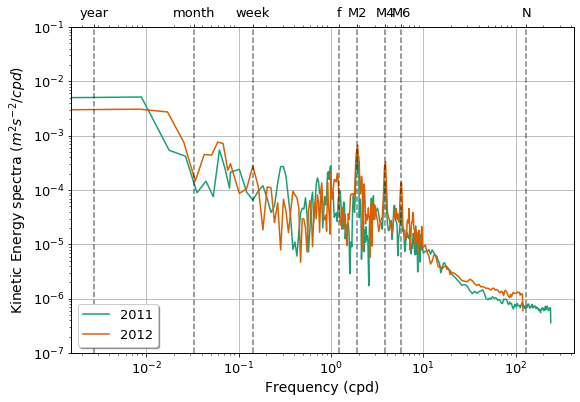

In [73]:
plt.rcParams.update({'font.size': 13})
data = spectra_speed

x_colors = np.linspace(0,1, len(data.keys()))
colors = cm.get_cmap('Dark2')(x_colors)

fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

for j, year in enumerate(range(2011,2014)):
    if year == 2013:
        continue
    ax1.loglog(data[year]['freq'], data[year]['psd'], 
               label=f"{year}", c=colors[j])

    ax2.loglog(data[year]['freq'], data[year]['psd'], alpha=0)

for typical_freq in upper_tick_locations:
    ax1.axvline(typical_freq, color='k', alpha=0.5, ls='--')

ax1.grid()
ax1.set_xlabel('Frequency (cpd)', fontsize=14)
ax1.set_ylabel('Kinetic Energy spectra ($m^2 s^{-2} /cpd$)', fontsize=14)
ax1.set_ylim(1e-7,1e-1)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(upper_tick_locations)
ax2.set_xticklabels(upper_tick_labels)
ax1.legend(loc='lower left', shadow=True)
plt.savefig('../figures/PowerSpectra/aquadopp/PSD_temp_aquadop_2011-2012.png', facecolor=(1,0,0,0))

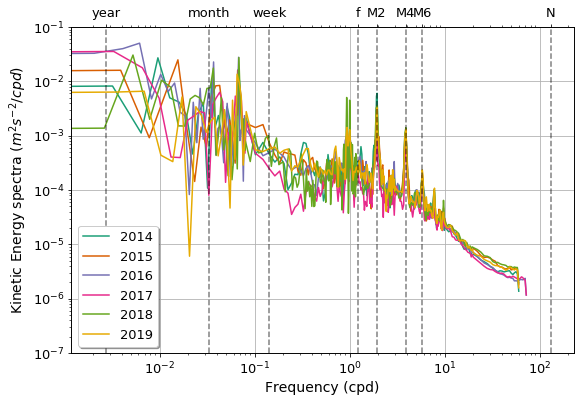

In [72]:
plt.rcParams.update({'font.size': 13})
data = spectra_speed

x_colors = np.linspace(0,1, len(data.keys()))
colors = cm.get_cmap('Dark2')(x_colors)

fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

for j, year in enumerate(range(2014,2020)):
    if year == 2013:
        continue
    ax1.loglog(data[year]['freq'], data[year]['psd'], 
               label=f"{year}", c=colors[j])

ax2.loglog(data[year]['freq'], data[year]['psd'], alpha=0)

for typical_freq in upper_tick_locations:
    ax1.axvline(typical_freq, color='k', alpha=0.5, ls='--')

ax1.grid()
ax1.set_xlabel('Frequency (cpd)', fontsize=14)
ax1.set_ylabel('Kinetic Energy spectra ($m^2 s^{-2} /cpd$)', fontsize=14)
ax1.set_ylim(1e-7,1e-1)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(upper_tick_locations)
ax2.set_xticklabels(upper_tick_labels)
ax1.legend(loc='lower left', shadow=True)
plt.savefig('../figures/PowerSpectra/aquadopp/PSD_temp_aquadop_2014-2019.png', facecolor=(1,0,0,0))

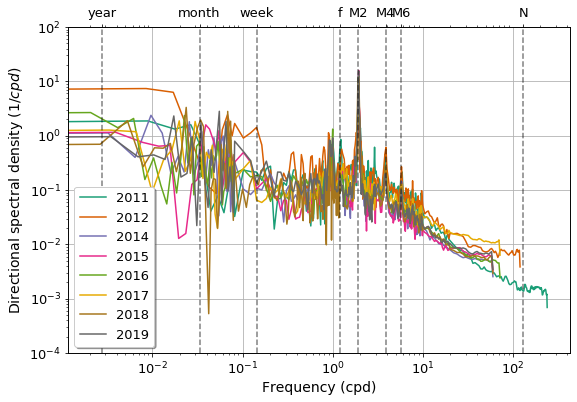

In [71]:
plt.rcParams.update({'font.size': 13})
data = spectra_dir

x_colors = np.linspace(0,1, len(data.keys()))
colors = cm.get_cmap('Dark2')(x_colors)

fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

for j, depth in enumerate(sorted(data.keys())):
    ax1.loglog(data[depth]['freq'], data[depth]['psd'], 
               label=f"{depth}", c=colors[j])

ax2.loglog(data[depth]['freq'], data[depth]['psd'], alpha=0)

for typical_freq in upper_tick_locations:
    ax1.axvline(typical_freq, color='k', alpha=0.5, ls='--')

ax1.grid()
ax1.set_xlabel('Frequency (cpd)', fontsize=14)
ax1.set_ylabel('Directional spectral density ($1/cpd$)', fontsize=14)
ax1.set_ylim(1e-4,1e2)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(upper_tick_locations)
ax2.set_xticklabels(upper_tick_labels)
ax1.legend(loc='lower left', shadow=True)
#### SAVE THIS ####
plt.savefig('../figures/PowerSpectra/aquadopp/PSD_temp_aquadop_direction.png', facecolor=(1,0,0,0))

# Turbulence Analysis

In [59]:
1.2*24

28.799999999999997

/Users/claudiopierard/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in power


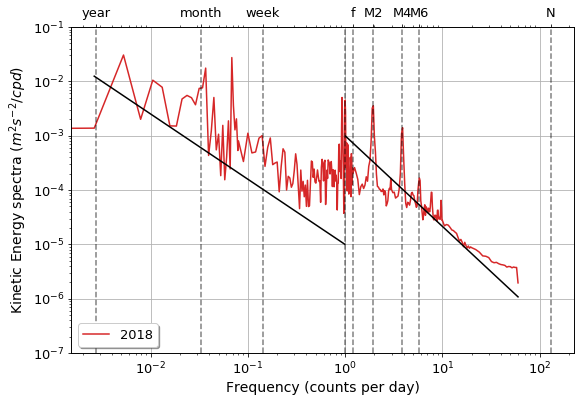

In [70]:
plt.rcParams.update({'font.size': 13})
data = spectra_speed

x_colors = np.linspace(0,1, len(data.keys()))
colors = cm.get_cmap('Dark2')(x_colors)

fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
year = 2018

freq = data[year]['freq']
inds = np.where(freq>1)

plt.loglog(freq[inds],freq[inds]**(-5./3.)*1e-3,'k')
inds = np.where(freq<1)
plt.loglog(freq[inds],freq[inds]**(-1.2)*1e-5,'k')

ax1.loglog(data[year]['freq'], data[year]['psd'], 
           label=f"{year}", c='tab:red')

ax2.loglog(data[year]['freq'], data[year]['psd'], alpha=0)

for typical_freq in upper_tick_locations:
    ax1.axvline(typical_freq, color='k', alpha=0.5, ls='--')

ax1.axvline(23.93447213/24, color='k', alpha=0.5, ls='--') # Lunar diurnal K1

ax1.grid()
ax1.set_xlabel('Frequency (counts per day)', fontsize=14)
ax1.set_ylabel('Kinetic Energy spectra ($m^2 s^{-2} /cpd$)', fontsize=14)
ax1.set_ylim(1e-7,1e-1)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(upper_tick_locations)
ax2.set_xticklabels(upper_tick_labels)
ax1.legend(loc='lower left', shadow=True)
#plt.savefig('../figures/PowerSpectra/aquadopp/PSD_temp_aquadop_2014-2019.png', facecolor=(1,0,0,0))

In [28]:
-5/3

-1.6666666666666667

##### 

In [26]:
data[2018]['psd'].sum()

0.21038785893870748

# visualizing the flow

The idea here was to match all the year to the Lunar new year at high tide and plot arrows showing the direction and speed of the flow at a certain point. I suppose that if the flow is mainly influenced by astronomical forcings, then the flows should be similar between one and other. 

this can be fun to see but is too much work and probably it is not very rigorous.

In [14]:
import pandas as pd

https://tidesandcurrents.noaa.gov/historic_tide_tables.html check station Ponta Delgada, Azores

In [15]:
aq19 = pd.read_csv('../support_data/aquadopp_csv/aquadopp_2019.csv', index_col=0)
aq18 = pd.read_csv('../support_data/aquadopp_csv/aquadopp_2018.csv', index_col=0)

In [16]:
lunar_ny_18_H = '2018-02-16 01:44' #lunar neew year
lunar_ny_19_H = '2019-02-05 01:46'

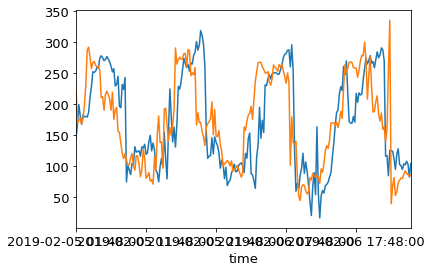

In [17]:
aq18['2018-02-16 01:44':'2018-02-18 01:44']['Direction'].plot()
aq19[lunar_ny_19_H:'2019-02-07 01:46']['Direction'].plot()

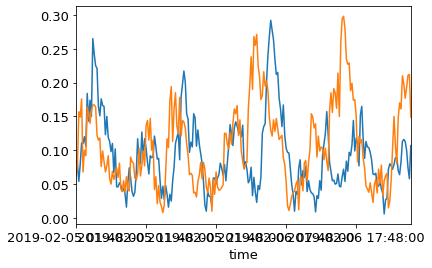

In [18]:
aq18['2018-02-16 01:44':'2018-02-18 01:44']['Speed'].plot()
aq19[lunar_ny_19_H:'2019-02-07 01:46']['Speed'].plot()

In [19]:
datadir = '../bathy/lucky20m.nc'
with Dataset(datadir, 'r') as nc:
    
    #print(nc.variables)

    depth = np.array(nc['depth'][:])
    lon = np.array(nc['lon'][:])
    lat = np.array(nc['lat'][:])
xlong, xlat = np.meshgrid(lon, lat)

In [20]:
with open('../support_data/mooring_coordinantes.pkl', 'rb') as f:
    mooring_position = pickle.load(f)

In [21]:
from matplotlib.animation import FuncAnimation

In [24]:
%matplotlib inline

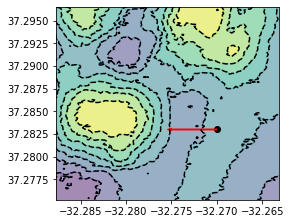

In [32]:
data = aq18['2018-02-16 01:44':'2018-02-17 01:44']
#t = 40
r = data['Speed'][0]
θ = data['Direction'][0]*np.pi/180
dx = r*np.cos(θ)*1e-2
dy = r*np.sin(θ)*1e-2

slice_x = slice(1990,-2240)
slice_y = slice(1679,-1019)
region = np.s_[slice_x, slice_y]
x, y, z = xlong[region], xlat[region], depth[region]
fig, ax = plt.subplots(figsize=(4,4))
ax.contourf(x,y,z, alpha=0.5)
ax.contour(x,y,z, colors='k')
ax.set_aspect(aspect='equal')
ax.scatter(*mooring_position[2018], c='k')
ax.arrow(*mooring_position[2018], dx, dy, width=0.0001, color='red')

<IPython.core.display.Javascript object>


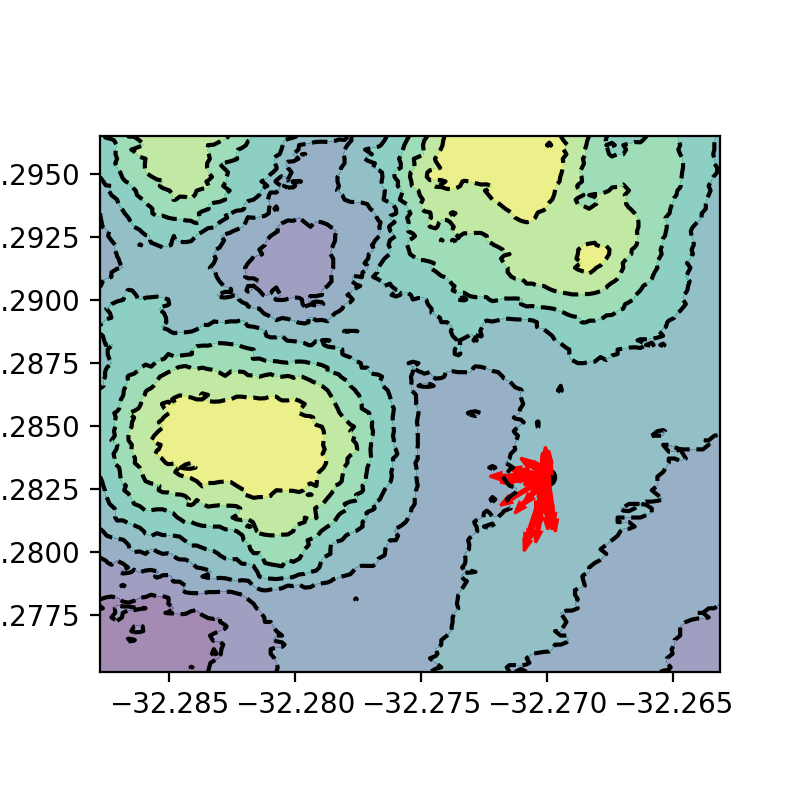

In [23]:
data = aq18['2018-02-16 01:44':'2018-02-17 01:44']
#t = 40
r = data['Speed'][0]
θ = data['Direction'][0]*np.pi/180
dx = r*np.cos(θ)*1e-2
dy = r*np.sin(θ)*1e-2

slice_x = slice(1990,-2240)
slice_y = slice(1679,-1019)
region = np.s_[slice_x, slice_y]
x, y, z = xlong[region], xlat[region], depth[region]
fig, ax = plt.subplots(figsize=(4,4))
ax.contourf(x,y,z, alpha=0.5)
ax.contour(x,y,z, colors='k')
ax.set_aspect(aspect='equal')
ax.scatter(*mooring_position[2018], c='k')

def func_anim(t):
    r = data['Speed'][t]
    θ = data['Direction'][t]*np.pi/180
    dx = r*np.cos(θ)*1e-2
    dy = r*np.sin(θ)*1e-2
    #arrow.set_data(dx, dy)
    ax.arrow(*mooring_position[2018], dx, dy, width=0.0001, color='red')
    
anim = FuncAnimation(fig, func_anim, range(0,120), blit=False, interval=10)


to this day, I have never liked the animation method in python. It sucks!